In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv').drop(columns=['id'])
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [3]:
df.Class.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [4]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


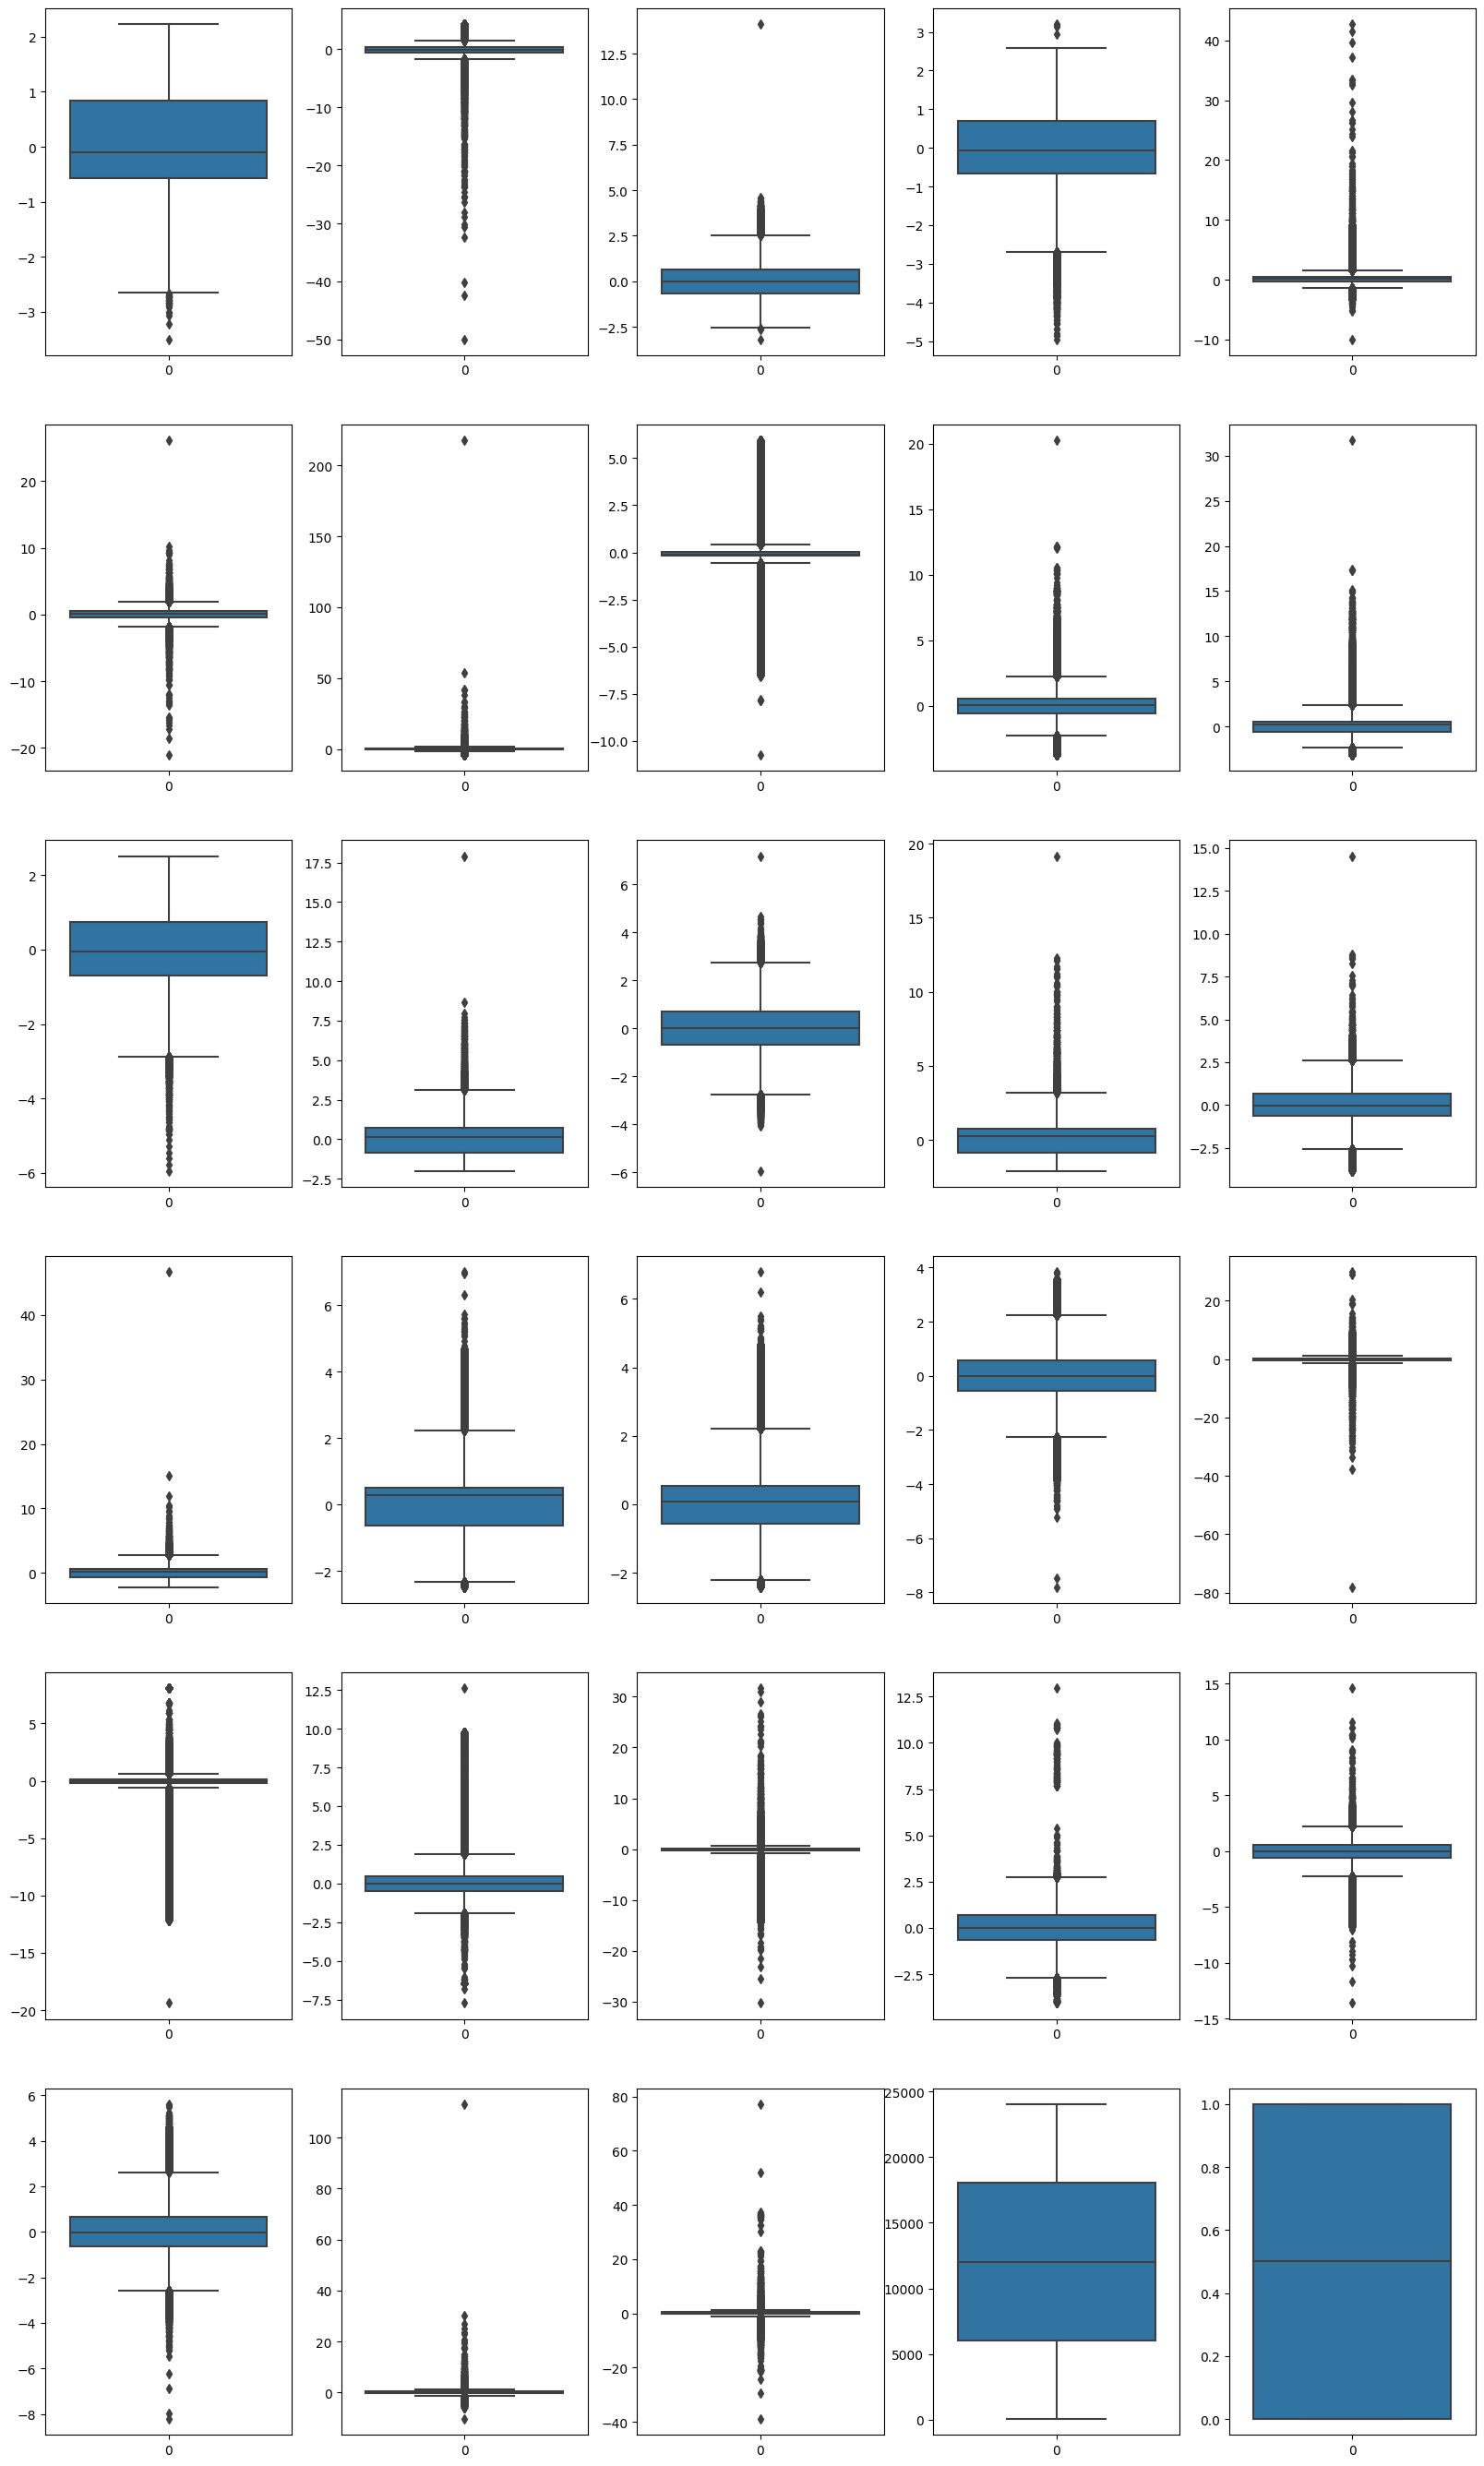

In [5]:
plt.figure(figsize=(20, 40))
for i, col in enumerate(df.columns):
    plt.subplot(7, 5, i+1)
    sns.boxplot(df[col])
plt.show()

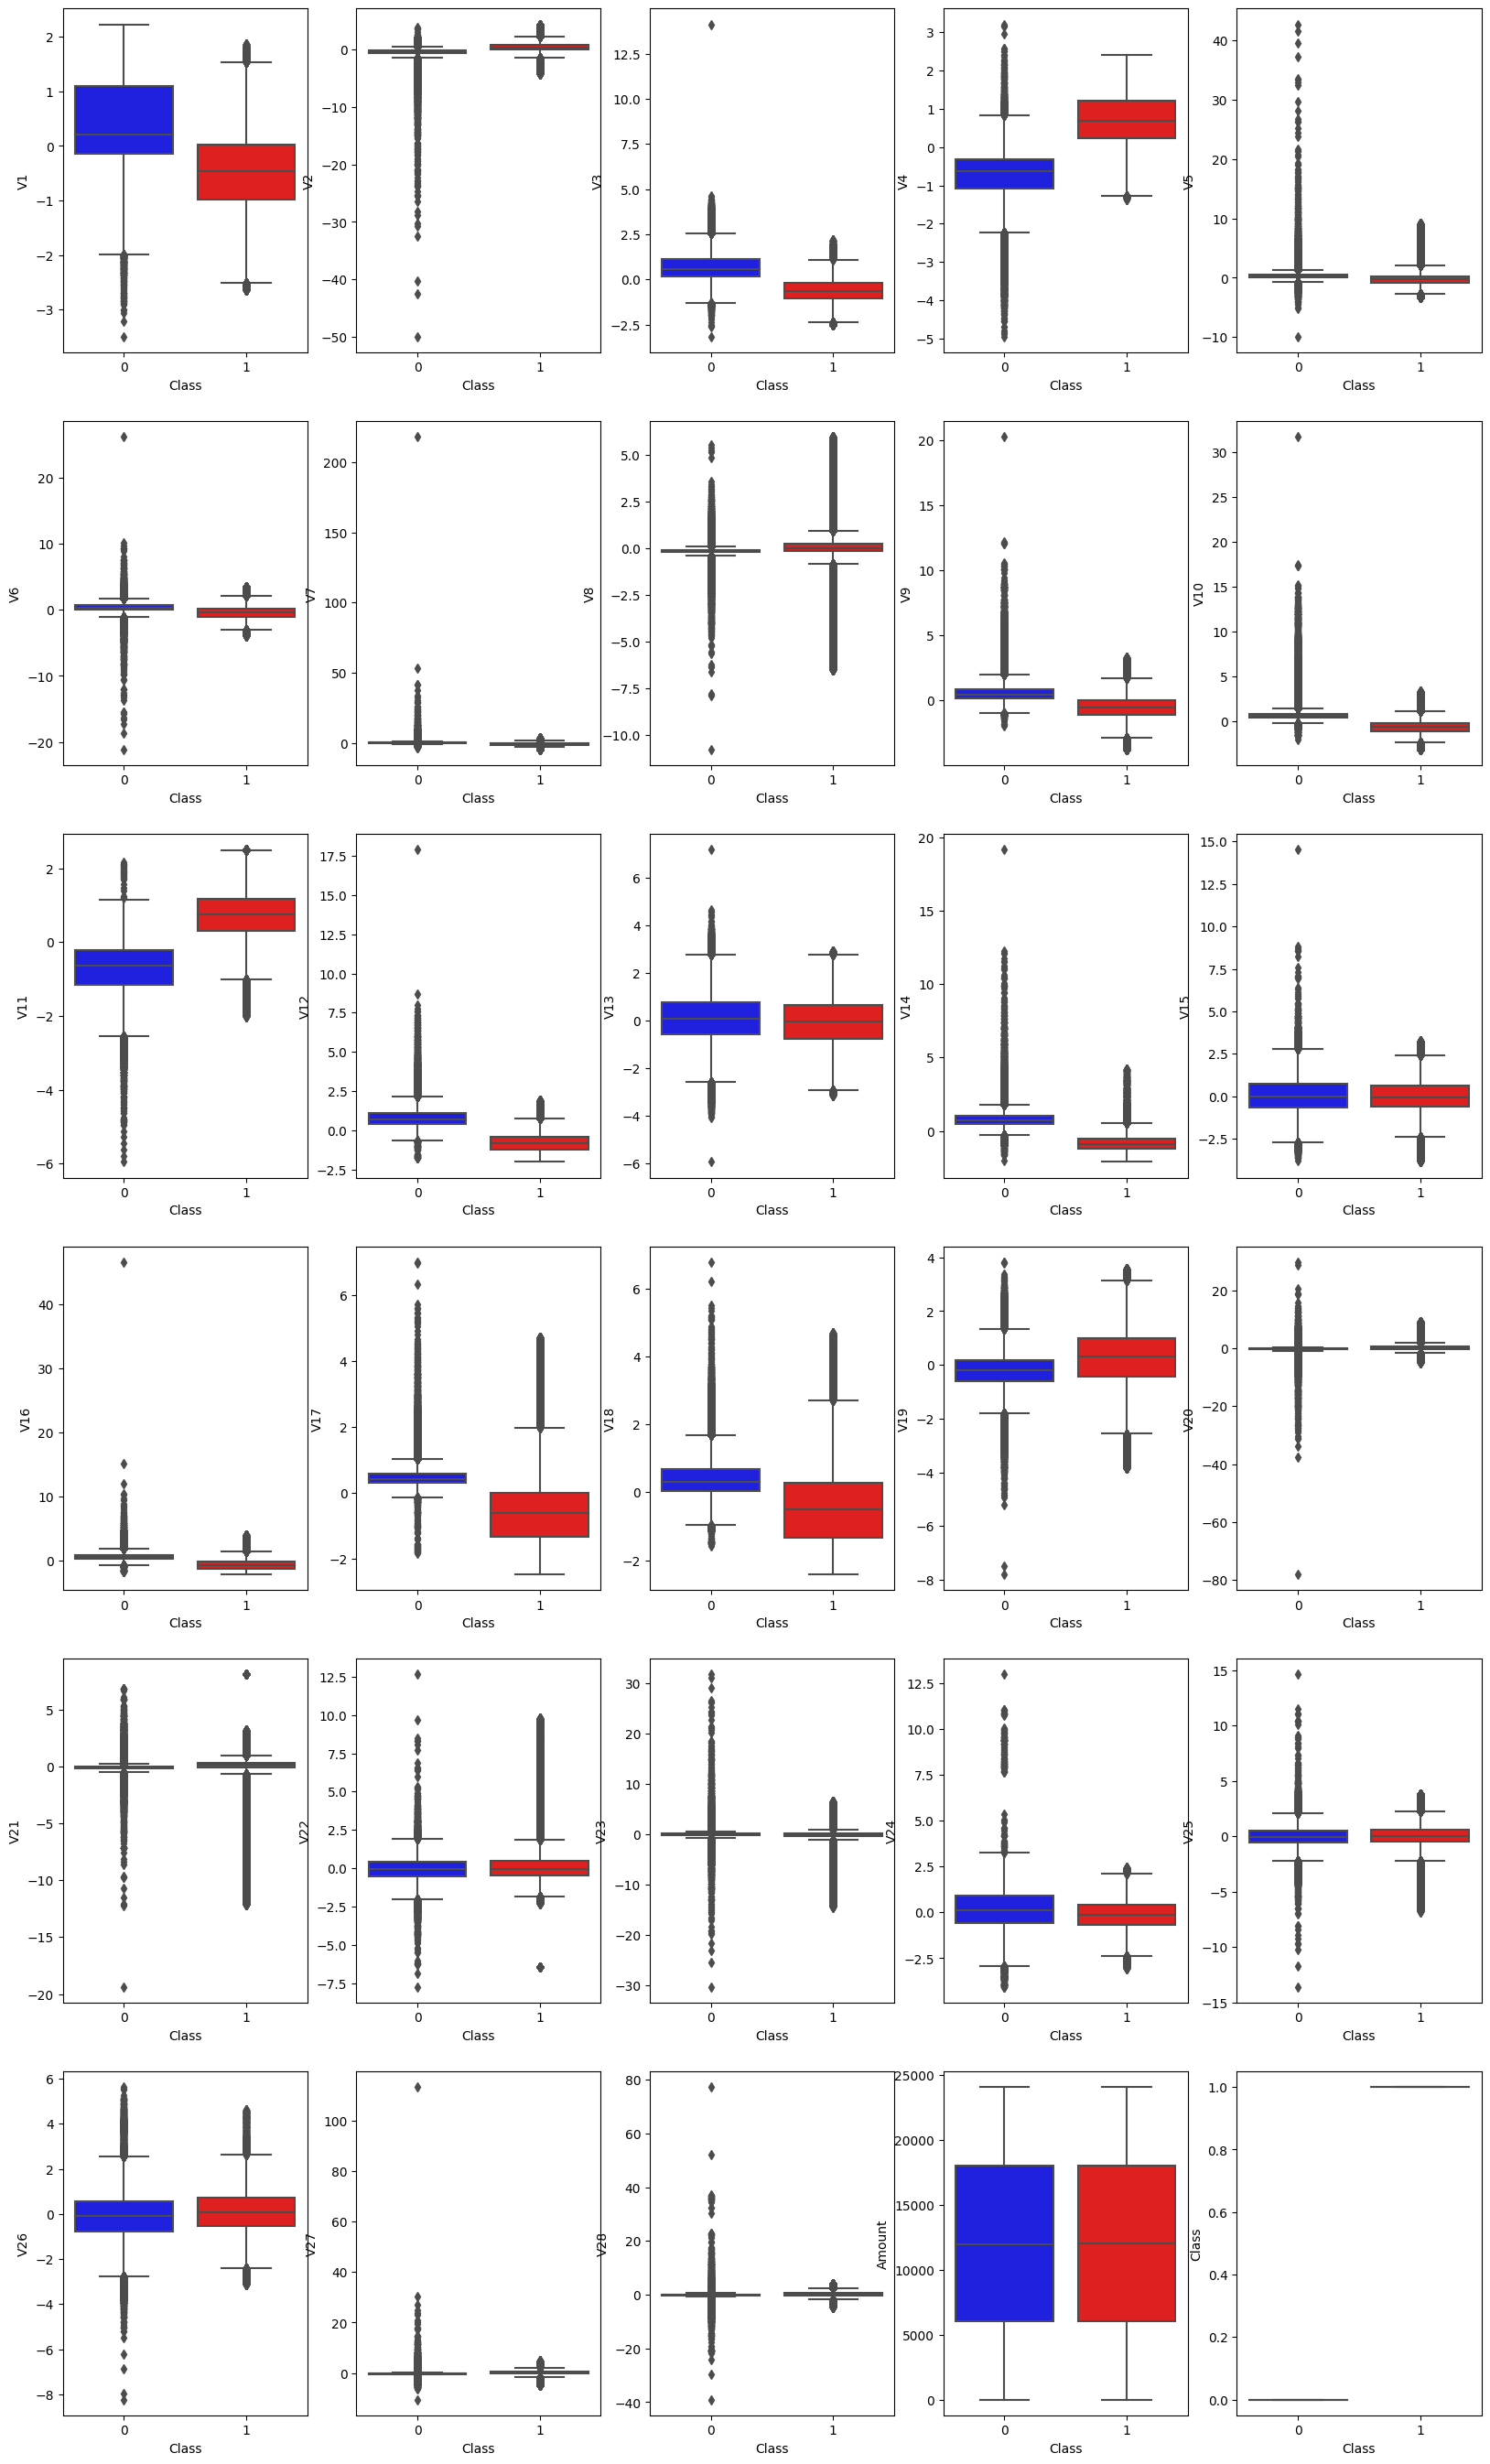

In [6]:
plt.figure(figsize=(20, 40))
for i, col in enumerate(df.columns):
    plt.subplot(7, 5, i+1)
    sns.boxplot(x='Class', y=col, data=df, palette={0: 'blue', 1: 'red'})
plt.show()

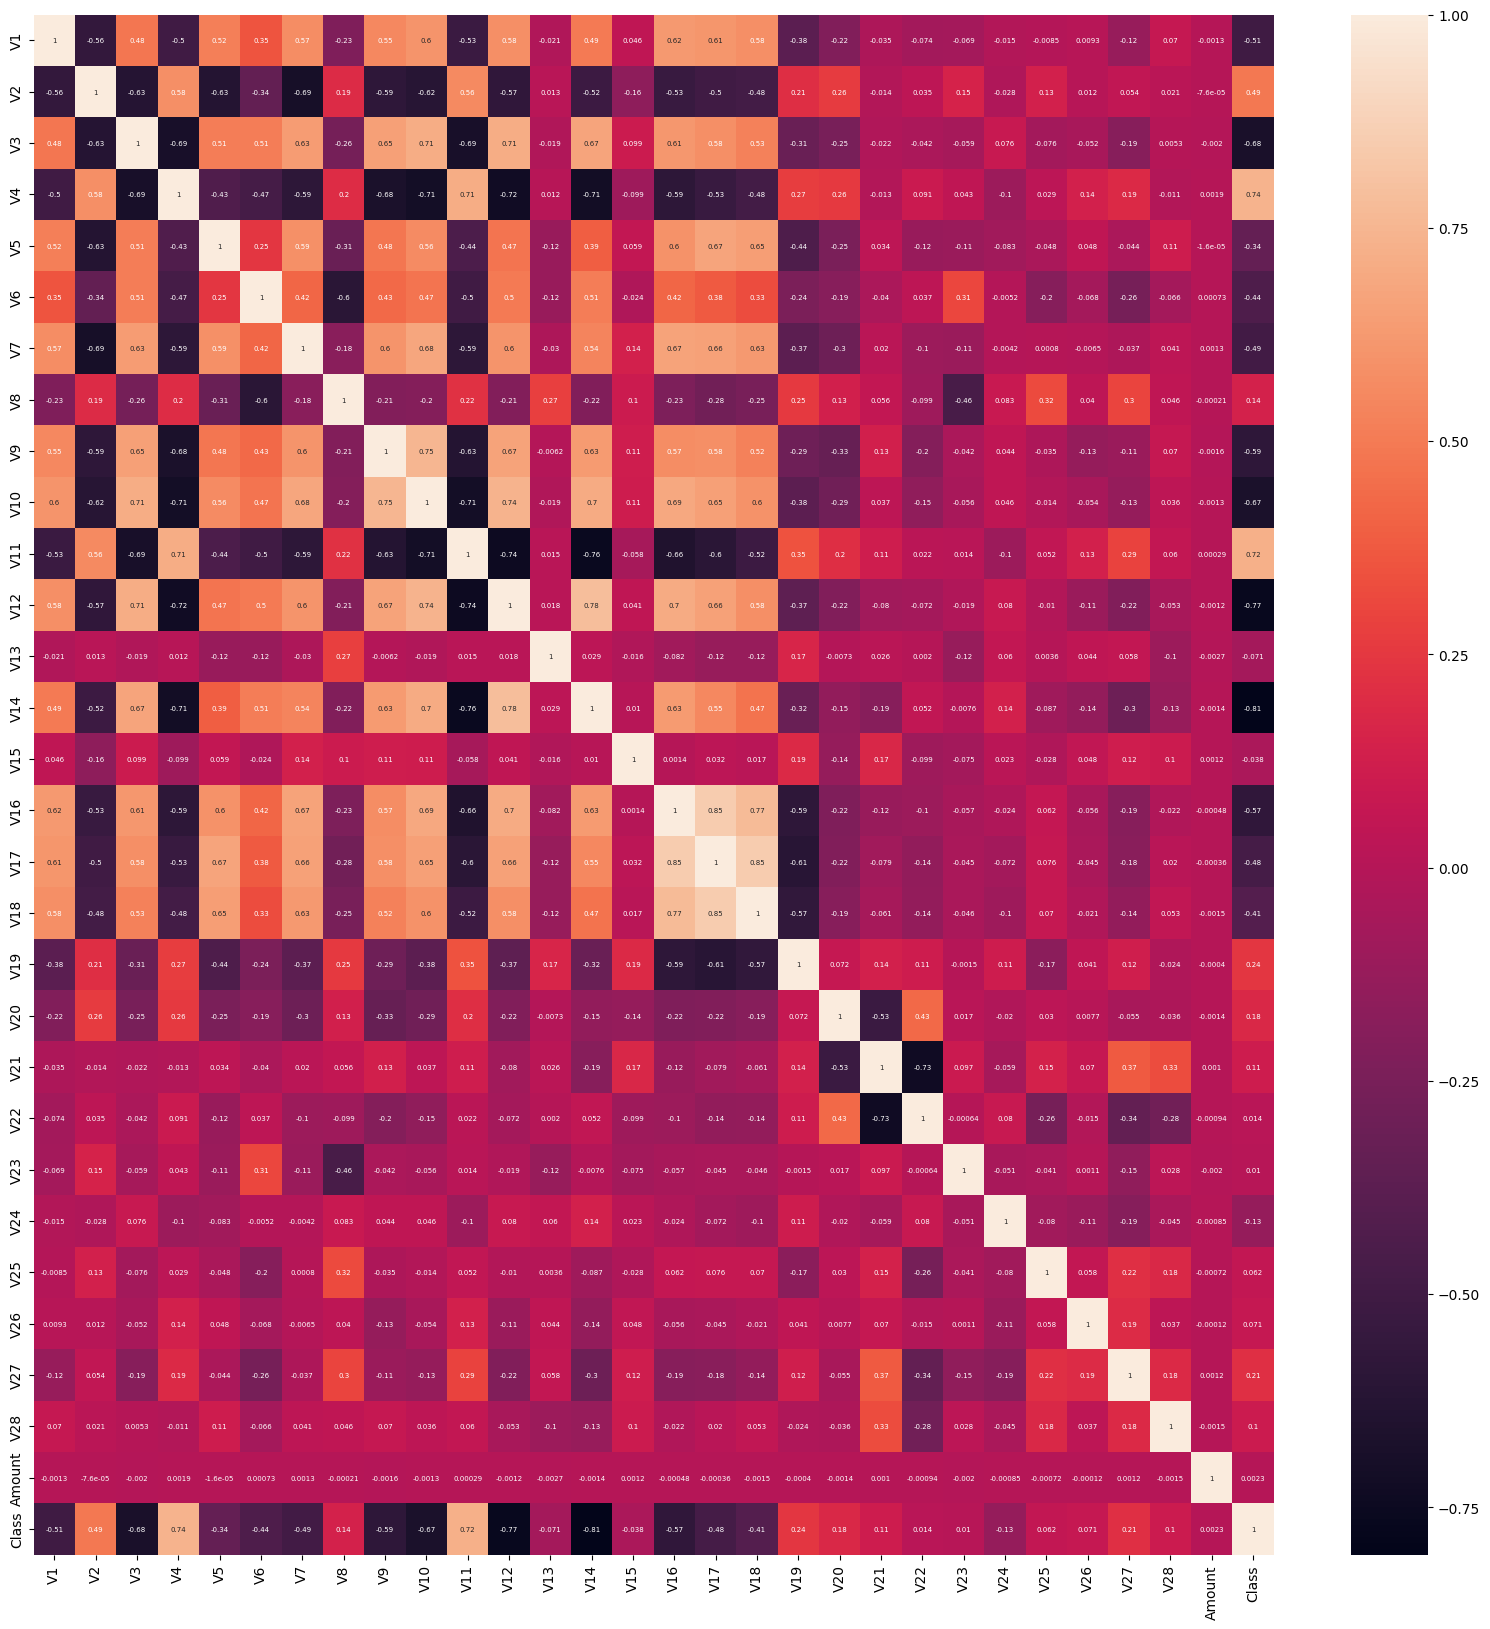

In [7]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':5})
plt.show()

In [8]:
corr_with_target = df.corr()['Class'].abs()
corr_with_target

V1        0.505761
V2        0.491878
V3        0.682095
V4        0.735981
V5        0.338639
V6        0.435088
V7        0.491234
V8        0.144294
V9        0.585522
V10       0.673665
V11       0.724278
V12       0.768579
V13       0.071105
V14       0.805669
V15       0.037948
V16       0.573511
V17       0.476377
V18       0.410091
V19       0.244081
V20       0.179851
V21       0.109640
V22       0.014098
V23       0.010255
V24       0.130107
V25       0.061847
V26       0.071052
V27       0.214002
V28       0.102024
Amount    0.002261
Class     1.000000
Name: Class, dtype: float64

In [9]:
# Set a threshold for correlation
threshold = 0.1

# Select features that have correlation greater than the threshold
relevant_features = corr_with_target[corr_with_target > threshold].index

# Drop irrelevant features
new_df = df[relevant_features]
new_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V24,V27,V28,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.165959,-0.081230,-0.151045,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.577395,-0.248052,-0.064512,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,-1.154666,-0.300258,-0.244718,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-1.893131,-0.165316,0.048424,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.312561,0.023712,0.419117,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,-1.480796,-1.520928,-1.376970,1.789103,-0.751011,0.167503,-0.900861,3.308968,0.081564,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,-0.545184,-0.575991,-0.664313,0.101604,-0.550260,0.031874,-0.846452,-1.528642,1.704306,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,-0.370201,-0.729002,-0.251679,-0.343196,-0.076417,0.140788,-0.448909,-0.487540,-0.268741,1
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,0.477402,0.848443,0.930280,-0.481058,0.288186,-0.060381,-0.554643,-0.159269,-0.076251,1


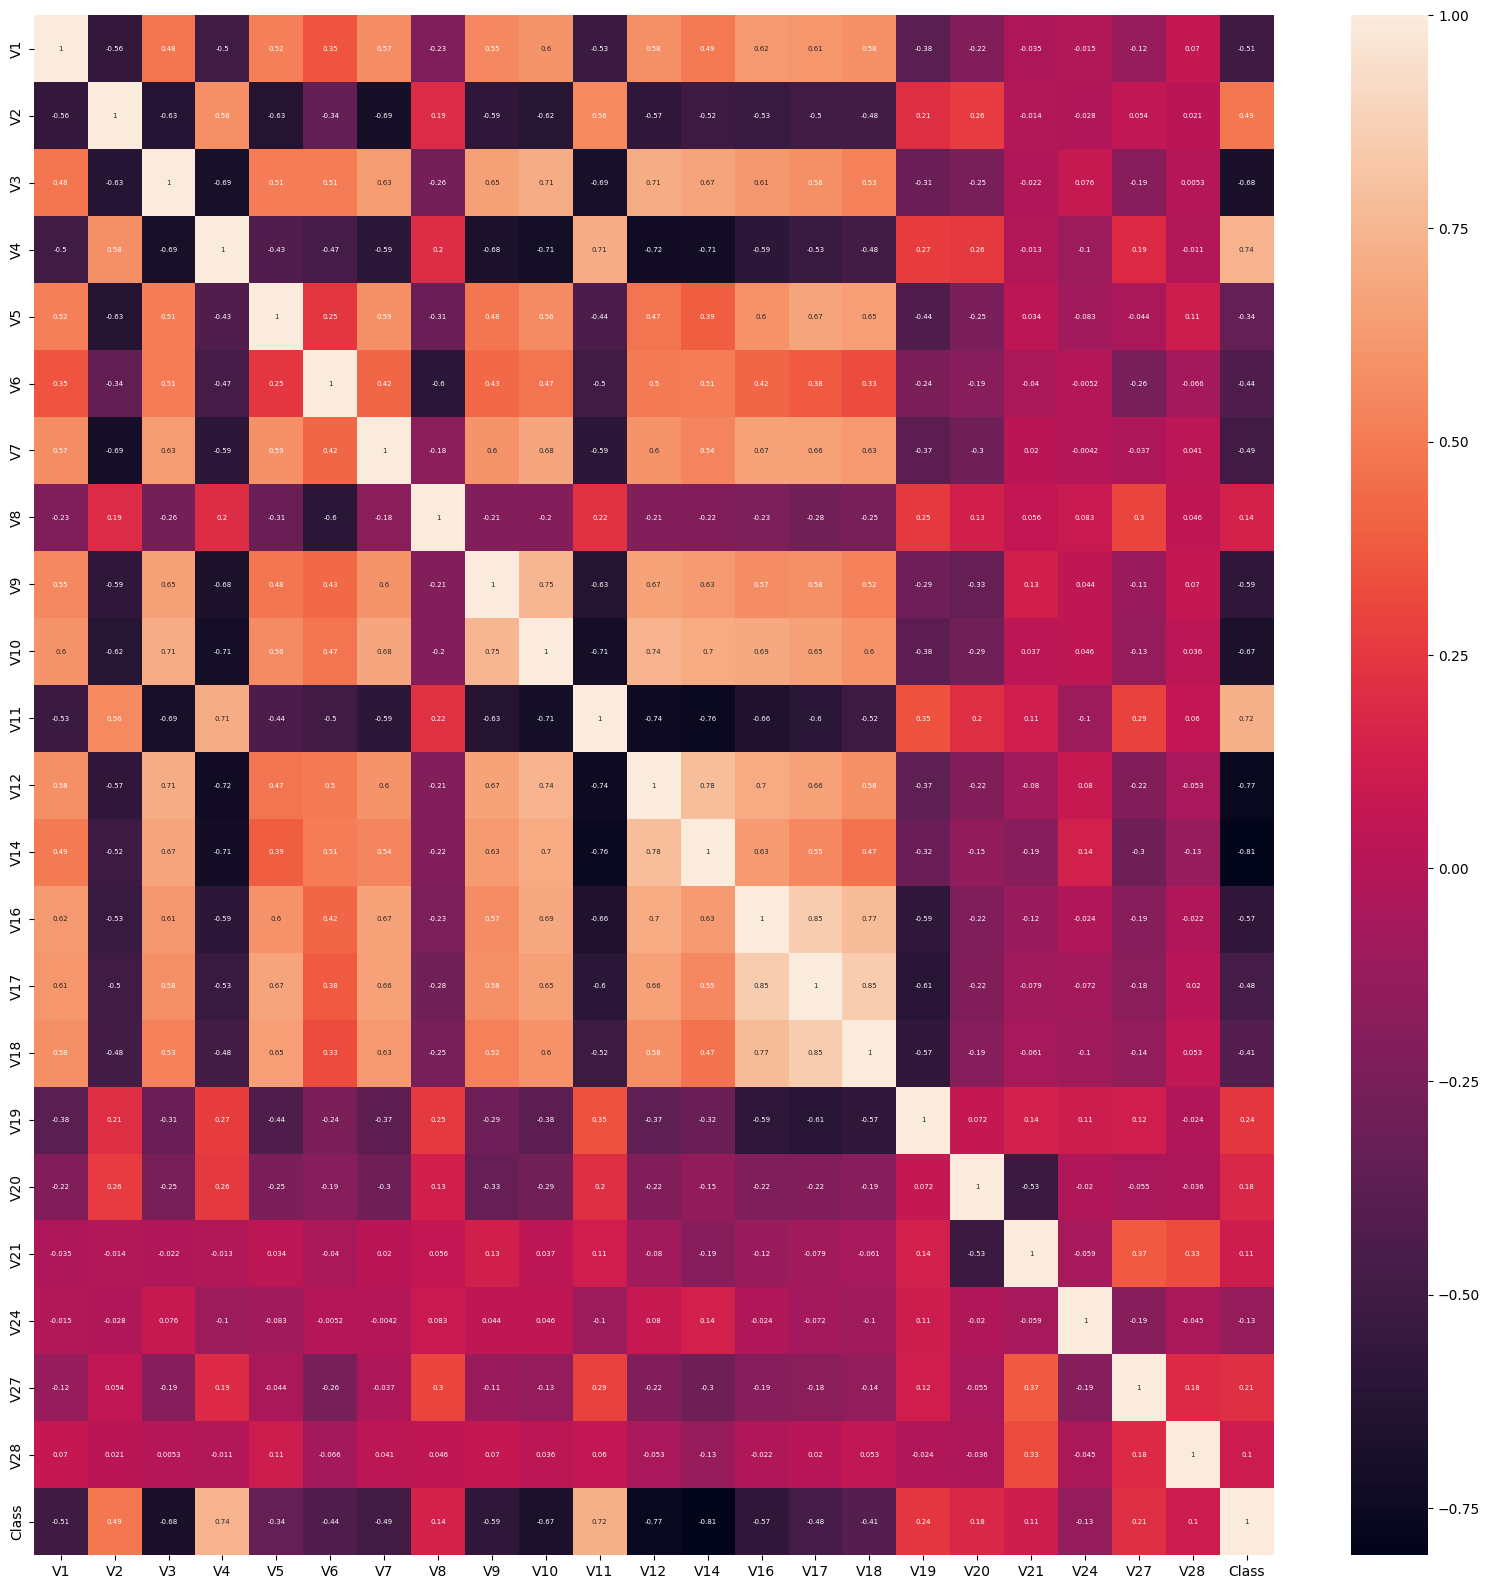

In [10]:
plt.figure(figsize=(20, 20))
sns.heatmap(new_df.corr(), annot=True, annot_kws={'size':5})
plt.show()

In [11]:
# newdf = df.drop(columns=['V1', 'V3', 'V6', 'V7', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V18'])
# plt.figure(figsize=(20, 20))
# sns.heatmap(newdf.corr(), annot=True, annot_kws={'size':5})
# plt.show()

In [12]:
new_df.duplicated().sum()

16595

In [13]:
new_df.loc[new_df.duplicated()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V24,V27,V28,Class
33,-0.012137,-0.166436,1.356104,-0.559352,0.427447,0.532977,0.708787,-0.112199,0.330179,0.410854,...,0.306951,0.344834,0.075870,-0.956099,-0.464520,-0.084409,0.038925,-0.320189,-0.043762,0
35,-0.014058,-0.169029,1.359264,-0.558402,0.436206,0.525499,0.701020,-0.111349,0.330770,0.411639,...,0.306161,0.345092,0.076058,-0.956445,-0.457069,-0.083381,0.038396,-0.325740,-0.038637,0
113,0.861595,-0.401677,0.567365,-0.177254,0.439828,0.988440,0.420548,-0.071366,0.567908,0.500002,...,-0.270557,0.948421,-0.770315,-1.848721,-0.512134,-0.062298,-1.054191,-0.143550,-0.097235,0
114,0.861595,-0.401677,0.567365,-0.177254,0.439828,0.988440,0.420548,-0.071366,0.567908,0.500002,...,-0.270557,0.948421,-0.770315,-1.848721,-0.512134,-0.062298,-1.054191,-0.143550,-0.097235,0
115,0.861595,-0.401677,0.567365,-0.177254,0.439828,0.988440,0.420548,-0.071366,0.567908,0.500002,...,-0.270557,0.948421,-0.770315,-1.848721,-0.512134,-0.062298,-1.054191,-0.143550,-0.097235,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568384,-1.678071,1.489363,-1.975512,1.489683,-2.029059,-3.031469,-1.829916,2.161222,-1.310393,-2.208984,...,-1.803097,-1.757519,-1.696682,1.037658,-1.652105,0.975459,0.915267,-2.267108,-1.853851,1
568394,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,-0.698893,...,-1.230971,-0.722383,-0.990630,-0.169996,-4.118596,8.087080,-1.075048,1.534445,2.154102,1
568444,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,-0.698893,...,-1.230971,-0.722383,-0.990630,-0.169996,-4.118596,8.087080,-1.075048,1.534445,2.154102,1
568476,1.043062,0.349575,-0.713899,1.015240,0.952147,-0.415372,0.166773,-0.124416,-0.754873,-0.325494,...,0.127471,0.078702,0.249991,-1.572502,0.152927,-0.020259,0.001214,0.345248,0.576382,1


In [14]:
df.loc[new_df.duplicated()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,-0.012137,-0.166436,1.356104,-0.559352,0.427447,0.532977,0.708787,-0.112199,0.330179,0.410854,...,-0.084409,0.151242,-0.209333,0.038925,0.077374,-1.381404,-0.320189,-0.043762,14494.30,0
35,-0.014058,-0.169029,1.359264,-0.558402,0.436206,0.525499,0.701020,-0.111349,0.330770,0.411639,...,-0.083381,0.149756,-0.210874,0.038396,0.076226,-1.382958,-0.325740,-0.038637,6884.95,0
113,0.861595,-0.401677,0.567365,-0.177254,0.439828,0.988440,0.420548,-0.071366,0.567908,0.500002,...,-0.062298,0.536421,-0.000373,-1.054191,0.714760,-0.380500,-0.143550,-0.097235,7014.17,0
114,0.861595,-0.401677,0.567365,-0.177254,0.439828,0.988440,0.420548,-0.071366,0.567908,0.500002,...,-0.062298,0.536421,-0.000373,-1.054191,0.714760,-0.380500,-0.143550,-0.097235,6281.15,0
115,0.861595,-0.401677,0.567365,-0.177254,0.439828,0.988440,0.420548,-0.071366,0.567908,0.500002,...,-0.062298,0.536421,-0.000373,-1.054191,0.714760,-0.380500,-0.143550,-0.097235,2755.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568384,-1.678071,1.489363,-1.975512,1.489683,-2.029059,-3.031469,-1.829916,2.161222,-1.310393,-2.208984,...,0.975459,0.546593,-0.766565,0.915267,-0.253192,-0.008434,-2.267108,-1.853851,16975.31,1
568394,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,-0.698893,...,8.087080,-6.450353,6.343132,-1.075048,0.349881,-0.240261,1.534445,2.154102,21912.11,1
568444,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,-0.698893,...,8.087080,-6.450353,6.343132,-1.075048,0.349881,-0.240261,1.534445,2.154102,15398.14,1
568476,1.043062,0.349575,-0.713899,1.015240,0.952147,-0.415372,0.166773,-0.124416,-0.754873,-0.325494,...,-0.020259,-0.423069,-0.178530,0.001214,0.977774,0.441313,0.345248,0.576382,23666.97,1


In [15]:
norm = new_df / new_df.max()
norm

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V24,V27,V28,Class
0,-0.116932,-0.107671,0.176716,-0.026151,0.003036,0.028007,0.002382,-0.021820,0.035874,0.020103,...,0.004621,0.073248,0.049183,0.032432,0.003053,-0.013670,0.012800,-0.000717,-0.001955,0.0
1,0.441938,-0.081627,0.039506,-0.134202,0.006488,0.016379,0.001866,-0.022343,0.017141,0.016701,...,0.016916,0.057736,0.029748,-0.088913,-0.007833,-0.024105,-0.044533,-0.002191,-0.000835,0.0
2,-0.116764,-0.217656,0.122367,-0.143052,0.001734,0.054244,0.003413,-0.016042,-0.012891,0.021773,...,-0.012379,0.126753,0.035297,-0.617506,0.012106,-0.000621,-0.089056,-0.002652,-0.003168,0.0
3,-0.068259,-0.116684,0.123663,-0.340517,0.005840,0.043691,0.002379,-0.010931,-0.010148,0.018133,...,-0.000657,0.034690,0.321154,-0.351037,-0.012661,-0.018168,-0.146011,-0.001460,0.000627,0.0
4,-0.092784,-0.037892,0.108104,-0.140024,0.002484,0.020274,0.003024,-0.035693,0.051797,0.030516,...,0.004813,0.052396,0.043012,0.116220,0.008276,-0.013229,0.024107,0.000209,0.005425,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.373899,0.014188,-0.063698,0.282435,-0.023466,0.018398,-0.001700,0.031838,-0.046283,-0.036625,...,-0.031741,-0.217458,-0.202982,0.466925,-0.025140,0.020712,-0.069481,0.029223,0.001056,1.0
568626,-0.300783,-0.046516,-0.004823,-0.083500,-0.003129,0.009062,-0.000078,-0.024796,0.023872,-0.006646,...,-0.011686,-0.082354,-0.097928,0.026517,-0.018420,0.003941,-0.065284,-0.013500,0.022061,1.0
568627,-0.139969,-0.000939,0.009736,-0.011211,-0.000990,0.004628,-0.000326,-0.003356,-0.006021,-0.004555,...,-0.007935,-0.104231,-0.037101,-0.089568,-0.002558,0.017409,-0.034623,-0.004306,-0.003479,1.0
568628,0.285714,-0.118520,-0.021301,-0.045128,0.003068,-0.011241,0.002665,-0.034864,0.044081,-0.002524,...,0.010233,0.121308,0.137134,-0.125548,0.009647,-0.007466,-0.042778,-0.001407,-0.000987,1.0


In [16]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(norm, test_size=0.15, train_size=0.85)
train_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V24,V27,V28,Class
324427,-0.188381,0.055306,-0.032680,-0.013666,-0.005005,-0.031425,-0.001230,-0.068922,0.013073,-0.014503,...,-0.018691,-0.134111,-0.126609,-0.002325,0.012266,0.051887,0.004030,-0.002544,-0.015241,1.0
200342,0.740607,-0.059357,0.020088,0.176843,0.010643,0.022672,0.002029,-0.023185,0.000261,0.043876,...,0.034198,0.023487,-0.010492,-0.418030,-0.015478,-0.036016,0.073102,-0.002408,-0.002088,0.0
243504,0.143427,-0.068606,0.050575,-0.247084,0.013157,-0.001860,0.003654,-0.037734,0.016841,0.018526,...,0.007601,0.039340,0.026099,0.089188,-0.006103,-0.020642,0.014526,-0.003041,-0.005325,0.0
194329,0.811237,-0.163159,0.009179,-0.222972,-0.003067,-0.026360,0.001632,-0.041079,0.010120,0.034951,...,-0.005139,0.071817,0.155348,-0.375735,-0.028455,-0.017139,0.158725,-0.002862,-0.002969,0.0
332329,-0.356314,0.099008,-0.046415,0.115843,-0.005682,-0.023381,-0.001594,-0.056995,0.013539,-0.016316,...,-0.019673,-0.133030,-0.120320,-0.083979,-0.021064,0.065726,0.072968,-0.013895,0.010389,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43590,0.440561,-0.111021,0.058486,-0.082965,-0.000470,0.002724,0.001689,-0.026024,0.049917,0.016650,...,0.008594,0.067220,0.001406,-0.005982,-0.011795,-0.028213,0.060930,-0.002389,-0.000769,0.0
14015,0.371179,-0.194541,0.042445,-0.432808,-0.000386,0.023831,0.001001,-0.022311,0.153199,0.003666,...,0.012564,0.061163,0.244805,0.199643,0.002565,-0.011608,-0.124564,-0.002335,-0.000614,0.0
323700,-0.463782,0.091294,-0.051999,0.154704,-0.024197,0.004632,-0.002557,0.046678,-0.017696,-0.022756,...,-0.026367,-0.183058,-0.185605,0.324593,-0.032442,0.029217,-0.006605,-0.014164,0.006790,1.0
60804,0.027569,-0.154136,0.068459,-0.472980,0.002152,0.017704,0.002243,-0.027590,-0.046525,0.040747,...,-0.001461,0.112275,0.034022,0.193275,0.000631,-0.024871,-0.045401,-0.000876,0.003052,0.0


In [17]:
train_X, train_Y = tf.constant(train_df.drop(columns=['Class']).to_numpy()), tf.constant(train_df['Class'])[..., tf.newaxis]
test_X, test_Y = tf.constant(test_df.drop(columns=['Class']).to_numpy()), tf.constant(test_df['Class'])
train_X

<tf.Tensor: shape=(483335, 22), dtype=float64, numpy=
array([[-0.18838084,  0.055306  , -0.03267989, ...,  0.00402962,
        -0.00254384, -0.01524115],
       [ 0.74060707, -0.05935693,  0.02008784, ...,  0.07310179,
        -0.00240834, -0.00208757],
       [ 0.14342676, -0.06860605,  0.05057531, ...,  0.0145262 ,
        -0.00304118, -0.00532491],
       ...,
       [-0.46378217,  0.09129356, -0.05199923, ..., -0.00660512,
        -0.01416438,  0.00679012],
       [ 0.02756947, -0.15413621,  0.06845874, ..., -0.04540055,
        -0.00087574,  0.00305219],
       [-0.12363488, -0.24246709,  0.0204045 , ..., -0.05994355,
        -0.00437711,  0.01044399]])>

In [18]:
BATCH = 32
train_data = tf.data.Dataset.from_tensor_slices((train_X, train_Y)).batch(BATCH).prefetch(buffer_size=tf.data.AUTOTUNE)

test_data = tf.data.Dataset.from_tensor_slices((test_X, test_Y)).batch(BATCH).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(train_X.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [21]:
history = model.fit(train_data,
                    epochs=10,
                    validation_data=test_data,
                    validation_steps=int(len(test_data)*0.3)
                   )

"""## Evaluate the Model"""

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch 1/10
15105/15105 [==============================] - 28s 2ms/step - loss: 0.1978 - accuracy: 0.9291 - val_loss: 0.0742 - val_accuracy: 0.9738
Epoch 2/10
15105/15105 [==============================] - 26s 2ms/step - loss: 0.1646 - accuracy: 0.9403 - val_loss: 0.0625 - val_accuracy: 0.9786
Epoch 3/10
15105/15105 [==============================] - 26s 2ms/step - loss: 0.1569 - accuracy: 0.9417 - val_loss: 0.0575 - val_accuracy: 0.9808
Epoch 4/10
15105/15105 [==============================] - 25s 2ms/step - loss: 0.1525 - accuracy: 0.9420 - val_loss: 0.0532 - val_accuracy: 0.9819
Epoch 5/10
15105/15105 [==============================] - 25s 2ms/step - loss: 0.1493 - accuracy: 0.9423 - val_loss: 0.0532 - val_accuracy: 0.9821
Epoch 6/10
15105/15105 [==============================] - 25s 2ms/step - loss: 0.1480 - accuracy: 0.9420 - val_loss: 0.0501 - val_accuracy: 0.9824
Epoch 7/10
15105/15105 [==============================] - 25s 2ms/step - loss: 0.1467 - accuracy: 0.9419 - val_loss: 0

In [22]:
"""## Save the Model"""

# Save the model for later use
model.save('credit_card_fraud_detection_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
"""## Make Predictions"""

# Make predictions on the test data
predictions = model.predict(test_X)
predictions = (predictions > 0.5).astype(int).flatten()

# Print a classification report
from sklearn.metrics import classification_report
print(classification_report(test_Y, predictions))

2666/2666 [==============================] - 3s 1ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     42482
         1.0       0.98      0.99      0.98     42813

    accuracy                           0.98     85295
   macro avg       0.98      0.98      0.98     85295
weighted avg       0.98      0.98      0.98     85295



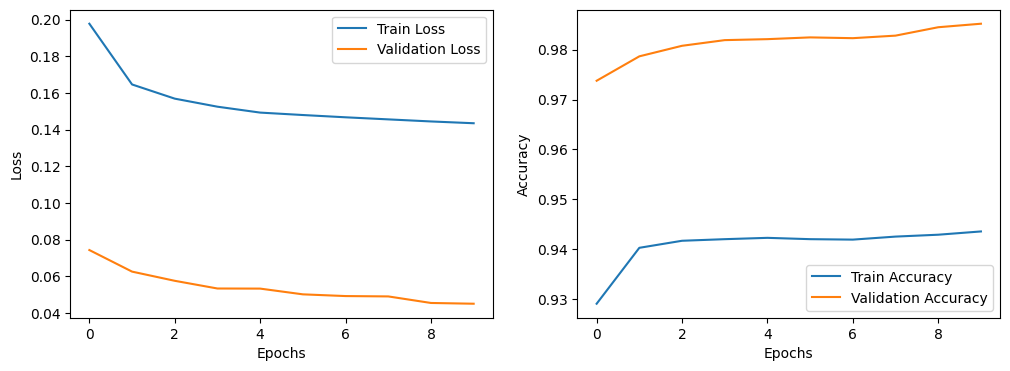

In [24]:
# Plot the loss and accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [25]:
# newdf = df.drop(columns=['V1', 'V3', 'V6', 'V7', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V18'])
# plt.figure(figsize=(20, 20))
# sns.heatmap(newdf.corr(), annot=True, annot_kws={'size':5})
# plt.show()

# """## Data Cleaning"""

# # Let's see if there are some duplicates
# newdf.duplicated().sum()

# newdf.loc[newdf.duplicated()]

# df.loc[newdf.duplicated()]

# newdf.loc[(newdf.V2.round(6) == 2.599199) & (newdf.Amount.round(2) == 22549.29)]

# newdf = newdf.drop_duplicates()

# # Let's see if there are null values we should worry about
# newdf.isna().sum().sum()

# # Let's normalize our data
# norm = newdf / newdf.max()
# norm

# # Let's now divide our data into train and test sets
# from sklearn.model_selection import train_test_split
# train_df, test_df = train_test_split(norm, test_size=0.15, train_size=0.85)
# train_df

# # For LSTM, we need to reshape the data to 3D (samples, time steps, features)
# train_X = train_df.drop(columns=['Class']).to_numpy().reshape(-1, 1, train_df.shape[1] - 1)
# train_Y = train_df['Class'].to_numpy().reshape(-1, 1, 1)
# test_X = test_df.drop(columns=['Class']).to_numpy().reshape(-1, 1, test_df.shape[1] - 1)
# test_Y = test_df['Class'].to_numpy().reshape(-1, 1, 1)

# # Let's turn them into Prefetched Datasets to give the yummy yummy the AI tummy
# BATCH = 32
# train_data = tf.data.Dataset.from_tensor_slices((train_X, train_Y)).batch(BATCH).prefetch(buffer_size=tf.data.AUTOTUNE)

# test_data = tf.data.Dataset.from_tensor_slices((test_X, test_Y)).batch(BATCH).prefetch(buffer_size=tf.data.AUTOTUNE)

# """## Make and Train the LSTM Model"""

# model = tf.keras.Sequential([
#     tf.keras.layers.LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.LSTM(32, return_sequences=False),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(),
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

# # Let's now feed the model 😋
# history = model.fit(train_data,
#                     epochs=10,
#                     validation_data=test_data,
#                     validation_steps=int(len(test_data)*0.3)
#                    )

# """## Evaluate the Model"""

# # Evaluate the model on the test data
# test_loss, test_accuracy = model.evaluate(test_data)
# print(f'Test Accuracy: {test_accuracy:.4f}')

# """## Save the Model"""

# # Save the model for later use
# model.save('credit_card_fraud_detection_lstm_model.h5')

# """## Make Predictions"""

# # Make predictions on the test data
# predictions = model.predict(test_X)
# predictions = (predictions > 0.5).astype(int).flatten()

# # Print a classification report
# from sklearn.metrics import classification_report
# print(classification_report(test_Y.flatten(), predictions))

# # Plot the loss and accuracy curves
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.show()

In [26]:
# newdf = df.drop(columns=['V1', 'V3', 'V6', 'V7', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V18'])
# plt.figure(figsize=(20, 20))
# sns.heatmap(newdf.corr(), annot=True, annot_kws={'size':5})
# plt.show()

# """## Data Cleaning"""

# # Let's see if there are some duplicates
# newdf.duplicated().sum()

# newdf.loc[newdf.duplicated()]

# df.loc[newdf.duplicated()]

# newdf.loc[(newdf.V2.round(6) == 2.599199) & (newdf.Amount.round(2) == 22549.29)]

# newdf = newdf.drop_duplicates()

# # Let's see if there are null values we should worry about
# newdf.isna().sum().sum()

# # Let's normalize our data
# norm = newdf / newdf.max()
# norm

# # Let's now divide our data into train and test sets
# train_df, test_df = train_test_split(norm, test_size=0.15, train_size=0.85)

# train_X = train_df.drop(columns=['Class']).to_numpy()
# train_Y = train_df['Class'].to_numpy()
# test_X = test_df.drop(columns=['Class']).to_numpy()
# test_Y = test_df['Class'].to_numpy()

# """## Train the XGBoost Model"""

# # Convert the data to DMatrix format, which is optimized for XGBoost
# dtrain = xgb.DMatrix(train_X, label=train_Y)
# dtest = xgb.DMatrix(test_X, label=test_Y)

# # Set the parameters for the XGBoost model
# params = {
#     'objective': 'binary:logistic',
#     'eval_metric': 'logloss',
#     'eta': 0.1,
#     'max_depth': 6,
#     'subsample': 0.8,
#     'colsample_bytree': 0.8
# }

# # Train the model
# bst = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, 'test')], early_stopping_rounds=10)

# """## Evaluate the Model"""

# # Make predictions on the test data
# preds = bst.predict(dtest)
# predictions = (preds > 0.5).astype(int)

# # Print a classification report
# print(classification_report(test_Y, predictions))
# print(f'Accuracy: {accuracy_score(test_Y, predictions):.4f}')

# """## Save the Model"""

# # Save the model for later use
# bst.save_model('credit_card_fraud_detection_xgb_model.json')

# """## Plot Feature Importance"""

# # Plot feature importance
# xgb.plot_importance(bst)
# plt.show()